# Generierte $a_z$ Messreihen

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# in this function a generator generates measurement sequences of a given class
# g_model=generator modell, class_\in{0,1,2,3}, n_samples=number of generated samples
def generate_fake_series(g_model, class_, n_samples):
    z_input, latent_points = generate_latent_points(100, n_samples=n_samples, n_classes = 4)  
    if class_==0:
        labels = np.zeros((n_samples))
    else: 
        labels = np.ones((n_samples))*class_
    [X, _]  = g_model.predict([z_input, labels])
    return X

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=4):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    # generate labels
    labels = np.random.randint(0, n_classes, n_samples)
    return [z_input, labels] 

In [3]:
# function returns 4 generator modells for each class
def load_model(): 
    model_class0 = tf.keras.models.load_model('CSGAN_27.05_150epochs_gen.h5')
    model_class1 = tf.keras.models.load_model('CSGAN_27.05_140epochs_gen.h5')
    model_class2 = tf.keras.models.load_model('CSGAN_27.05_170epochs_gen.h5')
    model_class3 = tf.keras.models.load_model('CSGAN_27.05_200epochs_gen.h5')
    return model_class0, model_class1, model_class2, model_class3

In [4]:
generator0, generator1, generator2, generator3 = load_model()

C:\Users\mdolokov\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\layers\core.py:1045: UserWarning: functions_generation_az is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


In [6]:
X_0 = generate_fake_series(generator0, class_=0, n_samples=10)
X_1 = generate_fake_series(generator1, class_=1, n_samples=10)
X_2 = generate_fake_series(generator2, class_=2, n_samples=10)
X_3 = generate_fake_series(generator3, class_=3, n_samples=10)

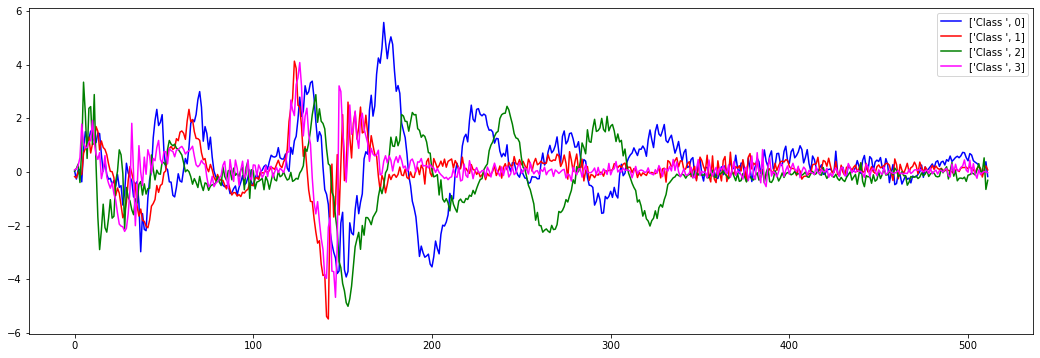

In [7]:
plt.figure(figsize=(18,6))
plt.plot(range(512), X_0[0], color='blue', label=['Class ', 0,])
plt.plot(range(512), X_1[0], color='red', label=['Class ', 1,])
plt.plot(range(512), X_2[0], color='green', label=['Class ', 2,])
plt.plot(range(512), X_3[0], color='magenta', label=['Class ', 3,])
plt.legend()
plt.show()